***DATA ANALYSIS***

In [3]:
#  

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os #file I/O
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import os

%matplotlib inline

import matplotlib.pyplot as plt #used for plotting and analyzing data

#used for image display
import PIL 
from PIL import Image

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.python.keras.models import Sequential
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import PIL 
from PIL import Image

In [4]:
import os
print(os.listdir("../input"))

['skin-cancer9-classesisic', 'isic-2019']


In [5]:
path='../input/'
csv_file='../input/isic-2019/ISIC_2019_Training_GroundTruth.csv'

In [6]:
data = pd.read_csv("../input/isic-2019/ISIC_2019_Training_GroundTruth.csv", header = 0)
data.head(20)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ISIC_0000006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ISIC_0000007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ISIC_0000008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ISIC_0000009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,ISIC_0000010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   25331 non-null  object 
 1   MEL     25331 non-null  float64
 2   NV      25331 non-null  float64
 3   BCC     25331 non-null  float64
 4   AK      25331 non-null  float64
 5   BKL     25331 non-null  float64
 6   DF      25331 non-null  float64
 7   VASC    25331 non-null  float64
 8   SCC     25331 non-null  float64
 9   UNK     25331 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [8]:
data = pd.read_csv("../input/isic-2019/ISIC_2019_Training_GroundTruth.csv", header = 0)

data.tail(20)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
25311,ISIC_0073224,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25312,ISIC_0073225,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25313,ISIC_0073227,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25314,ISIC_0073228,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25315,ISIC_0073229,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25316,ISIC_0073231,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25317,ISIC_0073232,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25318,ISIC_0073235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25319,ISIC_0073237,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25320,ISIC_0073238,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
lesion_type_dict = {
    'NV': 'Melanocytic nevi',
    'MEL': 'Melanoma',
    'BKL': 'Benign keratosis ',
    'BCC': 'Basal cell carcinoma',
    'AK': 'Actinic keratoses',
    'VASC': 'Vascular lesions',
    'DF': 'Dermatofibroma',
    'SCC' : 'Squamous cell carcinoma'
} 

In [10]:
data.describe()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
count,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.0
mean,0.178516,0.508270,0.131183,0.034227,0.103588,0.009435,0.009988,0.024792,0.0
std,0.382954,0.499941,0.337607,0.181815,0.304732,0.096677,0.099440,0.155493,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [11]:
data.corr()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
MEL,1.000000,-0.473941,-0.181140,-0.087758,-0.158468,-0.045496,-0.046822,-0.074327,NaN
NV,-0.473941,1.000000,-0.395056,-0.191395,-0.345610,-0.099224,-0.102117,-0.162102,NaN
BCC,-0.181140,-0.395056,1.000000,-0.073151,-0.132092,-0.037923,-0.039029,-0.061955,NaN
AK,-0.087758,-0.191395,-0.073151,1.000000,-0.063995,-0.018373,-0.018909,-0.030016,NaN
BKL,-0.158468,-0.345610,-0.132092,-0.063995,1.000000,-0.033177,-0.034144,-0.054201,NaN
DF,-0.045496,-0.099224,-0.037923,-0.018373,-0.033177,1.000000,-0.009803,-0.015561,NaN
VASC,-0.046822,-0.102117,-0.039029,-0.018909,-0.034144,-0.009803,1.000000,-0.016015,NaN
SCC,-0.074327,-0.162102,-0.061955,-0.030016,-0.054201,-0.015561,-0.016015,1.000000,NaN
UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


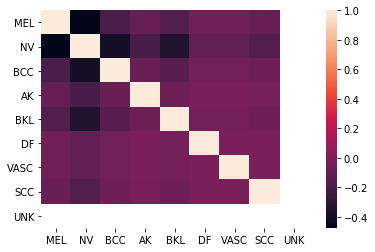

In [12]:
sns.heatmap(data.corr())

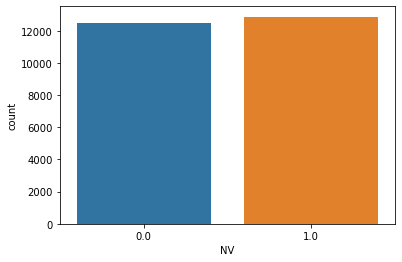

1.0    12875
0.0    12456
Name: NV, dtype: int64

In [13]:
sns.countplot(data['NV'])
plt.show()
data['NV'].value_counts()

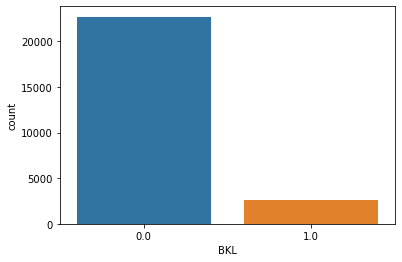

0.0    22707
1.0     2624
Name: BKL, dtype: int64

In [14]:
sns.countplot(data['BKL'])
plt.show()
data['BKL'].value_counts()

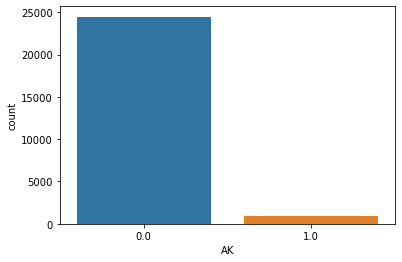

0.0    24464
1.0      867
Name: AK, dtype: int64

In [15]:
sns.countplot(data['AK'])
plt.show()
data['AK'].value_counts()

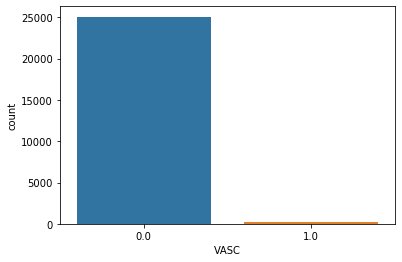

0.0    25078
1.0      253
Name: VASC, dtype: int64

In [16]:
sns.countplot(data['VASC'])
plt.show()
data['VASC'].value_counts()

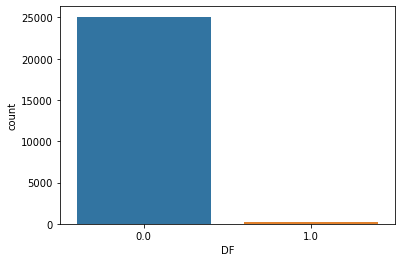

0.0    25092
1.0      239
Name: DF, dtype: int64

In [17]:
sns.countplot(data['DF'])
plt.show()
data['DF'].value_counts()

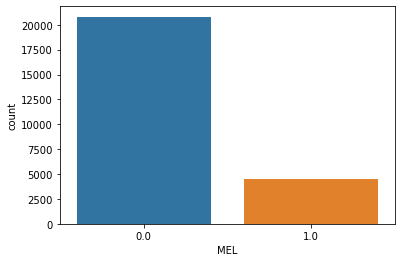

0.0    20809
1.0     4522
Name: MEL, dtype: int64

In [18]:
sns.countplot(data['MEL'])
plt.show()
data['MEL'].value_counts()

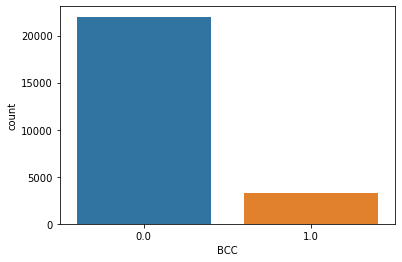

0.0    22008
1.0     3323
Name: BCC, dtype: int64

In [19]:
sns.countplot(data['BCC'])
plt.show()
data['BCC'].value_counts()

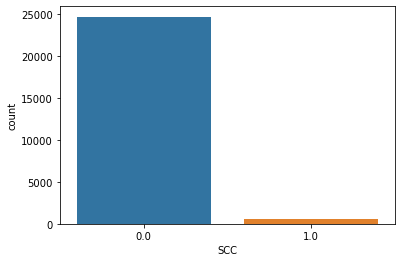

0.0    24703
1.0      628
Name: SCC, dtype: int64

In [20]:
sns.countplot(data['SCC'])
plt.show()
data['SCC'].value_counts()

***THE PREPROCESSING OF SKIN IMAGES***

In [21]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import textwrap as tw
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.applications.resnet import preprocess_input
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.python.keras.models import Sequential
from tensorflow.keras import layers


Using TensorFlow backend.


In [22]:
# print all columns
pd.set_option('display.max_columns', None)

# inhibit graphics card runs out of memory
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)


In [23]:
def load_data(path: str):
    dir = Path(path)
    # list of all filepathes
    filepaths = list(dir.glob(r'**/*.jpg'))
    # list of labels extracted from last foldername of filepath
    labels = list(map(lambda l: os.path.split(os.path.split(l)[0])[1], filepaths))
    # series of string filepathes
    filepaths = pd.Series(filepaths, name='FilePaths').astype(str)
    # series of string labels
    labels = pd.Series(labels, name='Labels').astype(str)
    # merge series to dataframe df
    df = pd.merge(filepaths, labels, right_index=True, left_index=True)
    # Resampling complete rows and reset the index
    return df.sample(frac=1).reset_index(drop=True)
df = load_data('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [24]:
# total categires 
len(os.listdir('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train'))

9

In [25]:
os.listdir('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

['pigmented benign keratosis',
 'melanoma',
 'vascular lesion',
 'actinic keratosis',
 'squamous cell carcinoma',
 'basal cell carcinoma',
 'seborrheic keratosis',
 'dermatofibroma',
 'nevus']

In [26]:
list_diseases = os.listdir('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [27]:
results2 = []
for disease in list_diseases:
    dies_name_count = {}
    count_disease = len(os.listdir(f'../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train'))
    dies_name_count['disease'] = disease
    dies_name_count['count_images'] = count_disease
    results2.append(dies_name_count)

In [28]:
results = pd.DataFrame(results2)
results

,disease,count_images
0,pigmented benign keratosis,9
1,melanoma,9
2,vascular lesion,9
3,actinic keratosis,9
4,squamous cell carcinoma,9
5,basal cell carcinoma,9
6,seborrheic keratosis,9
7,dermatofibroma,9
8,nevus,9


In [29]:
df.head(25)

,FilePaths,Labels
0,../input/skin-cancer9-classesisic/Skin cancer ...,basal cell carcinoma
1,../input/skin-cancer9-classesisic/Skin cancer ...,pigmented benign keratosis
2,../input/skin-cancer9-classesisic/Skin cancer ...,basal cell carcinoma
3,../input/skin-cancer9-classesisic/Skin cancer ...,actinic keratosis
4,../input/skin-cancer9-classesisic/Skin cancer ...,pigmented benign keratosis
5,../input/skin-cancer9-classesisic/Skin cancer ...,basal cell carcinoma
6,../input/skin-cancer9-classesisic/Skin cancer ...,squamous cell carcinoma
7,../input/skin-cancer9-classesisic/Skin cancer ...,melanoma
8,../input/skin-cancer9-classesisic/Skin cancer ...,nevus
9,../input/skin-cancer9-classesisic/Skin cancer ...,melanoma


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FilePaths  2239 non-null   object
 1   Labels     2239 non-null   object
dtypes: object(2)
memory usage: 35.1+ KB


[Text(0, 0, 'seborrheic keratosis'),
 Text(0, 0, 'dermatofibroma'),
 Text(0, 0, 'actinic keratosis'),
 Text(0, 0, 'vascular lesion'),
 Text(0, 0, 'squamous cell carcinoma'),
 Text(0, 0, 'nevus'),
 Text(0, 0, 'basal cell carcinoma'),
 Text(0, 0, 'melanoma'),
 Text(0, 0, 'pigmented benign keratosis')]

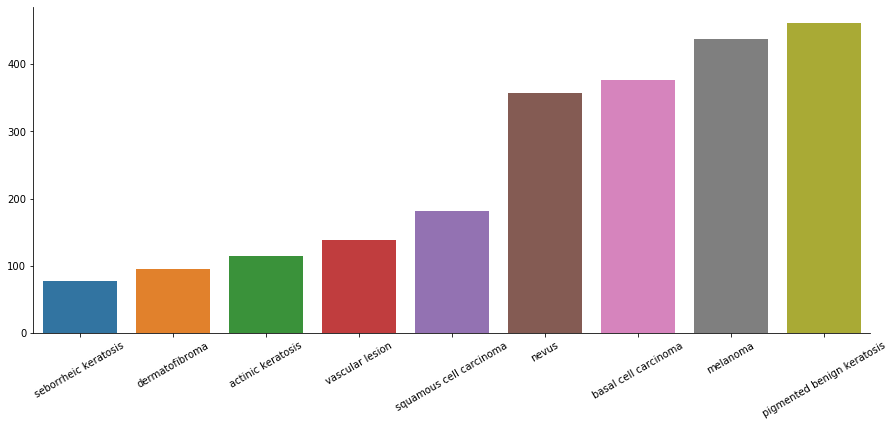

In [31]:
# ordered count of rows per unique label
labels_count = df['Labels'].value_counts(ascending=True)

f = plt.figure(figsize=(15, 6))
s = sns.barplot(labels_count.index,labels_count.values)
sns.despine()
s.set_xticklabels(s.get_xticklabels(), rotation = 30)

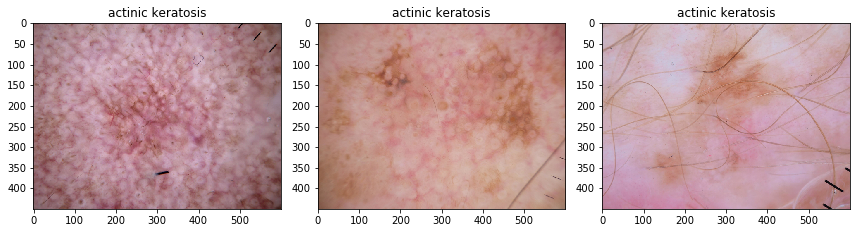

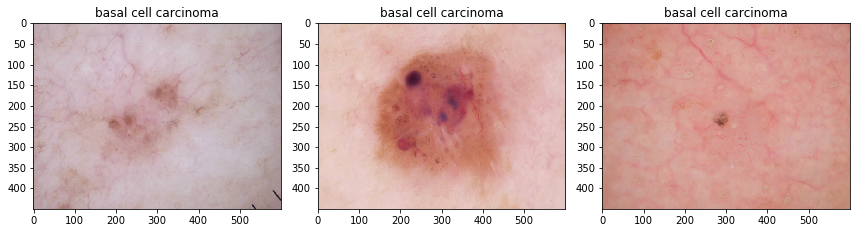

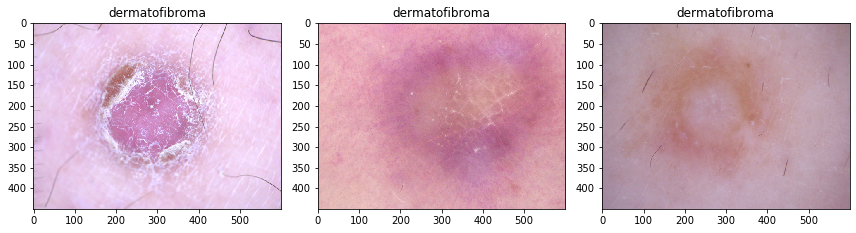

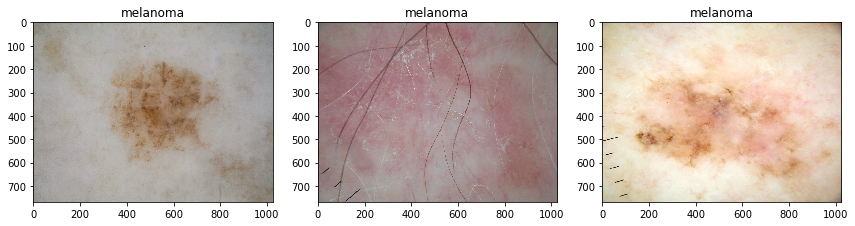

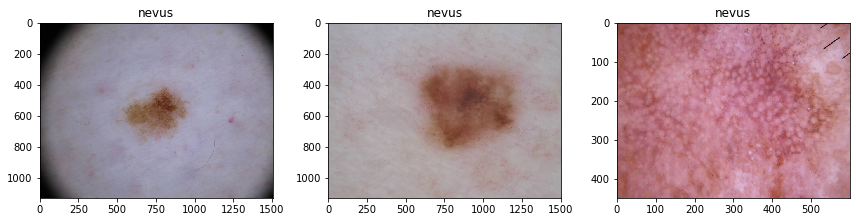

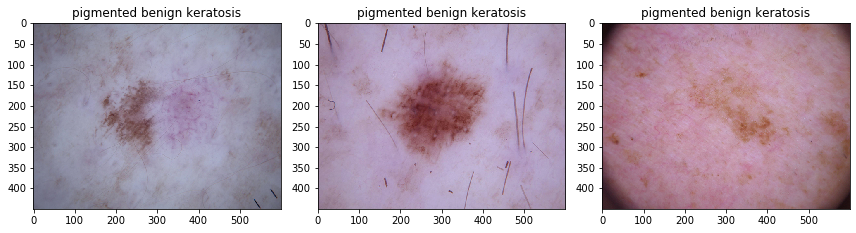

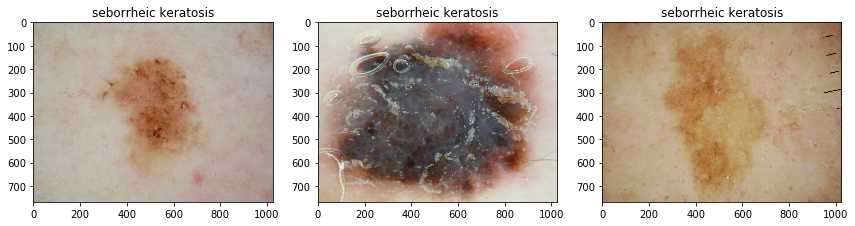

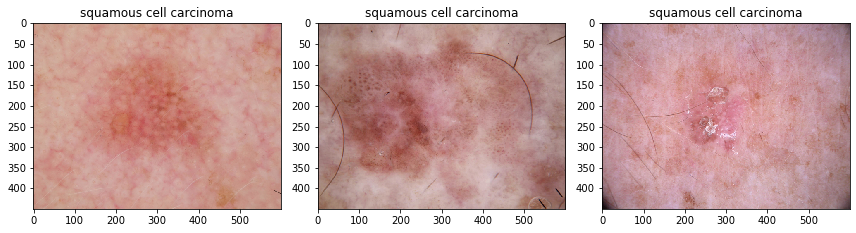

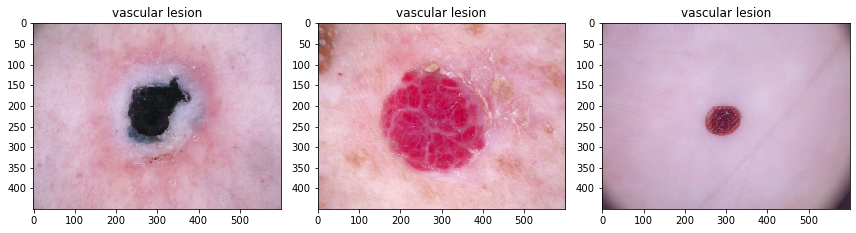

In [32]:
def plot_images_per_label(df, label, cols: int, size: tuple):
    fig, axs = plt.subplots(nrows=1, ncols=cols, figsize=size)

    cntMax = cols
    cntCur = 0
    for index, row in df.iterrows():
        if(row['Labels'] == label and cntCur < cntMax):
            axs[cntCur].imshow(plt.imread(df.FilePaths[index]))
            axs[cntCur].set_title(df.Labels[index])

            cntCur += 1
        else:
            if(cntCur >= cntMax):
                break
    
    plt.tight_layout()
    plt.show()


# unique labels
labels = sorted(df['Labels'].unique())
# loop through labels
for label in labels:
    plot_images_per_label(df, label, 3, (12,9))

In [33]:
# stratified train and val (20%) datasets
X_train, X_val = train_test_split(df, test_size=0.2, stratify=df['Labels'], random_state=1)

print('Train Data: ', X_train.shape)
print('Val Data: ', X_val.shape)

Train Data:  (1791, 2)
Val Data:  (448, 2)


In [34]:
# number of samples/images per iteration
BATCH_SIZE = 32
# input image size
IMG_SIZE = (224, 224)
# count of epchos
EPOCHS = 10

# image preprocessing
img_data_gen = ImageDataGenerator(shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  preprocessing_function=preprocess_input)

X_train = img_data_gen.flow_from_dataframe(dataframe=X_train,
                                           x_col='FilePaths',
                                           y_col='Labels',
                                           target_size=IMG_SIZE,
                                           color_mode='rgb',
                                           class_mode='categorical',
                                           batch_size=BATCH_SIZE,
                                           seed=1)

X_val = img_data_gen.flow_from_dataframe(dataframe=X_val,
                                         x_col='FilePaths',
                                         y_col='Labels',
                                         target_size=IMG_SIZE,
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         seed=1)

Found 1791 validated image filenames belonging to 9 classes.
Found 448 validated image filenames belonging to 9 classes.


/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


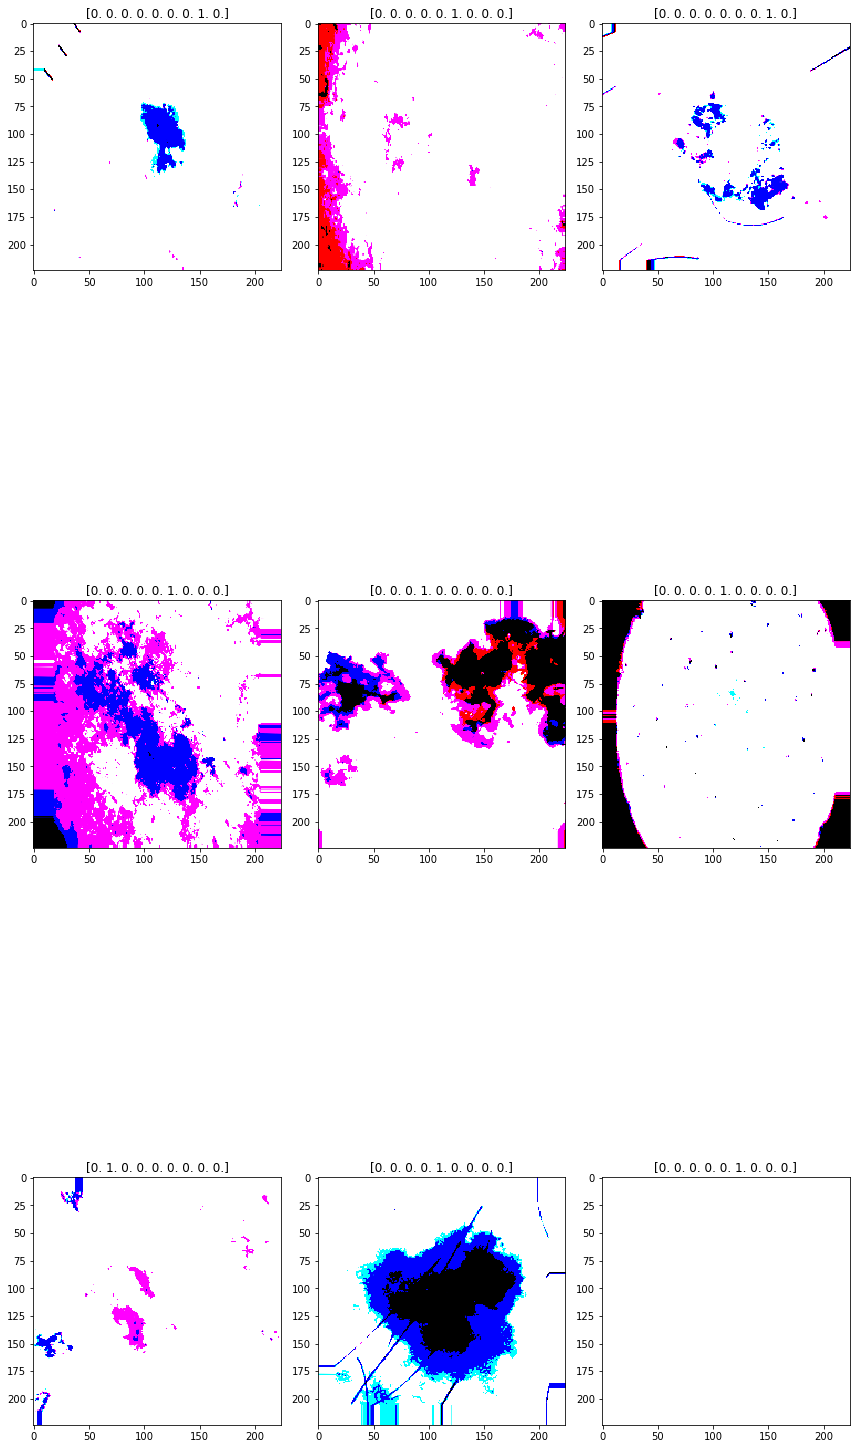

In [35]:
fit, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,27))

for i, a in enumerate(ax.flat):
    img, label = X_train.next()
    a.imshow(img[0],)
    a.set_title(label[0])

plt.tight_layout()
plt.show()

In [36]:
#training data
training_dir="../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
#increases amount of data by making different forms of image
training_generator = ImageDataGenerator(rescale=1/255,
                                        featurewise_center = True,
                                        samplewise_center=True, 
                                        featurewise_std_normalization=False,
                                        samplewise_std_normalization=True,
                                        zca_whitening=False,
                                        rotation_range=30, 
                                        zoom_range=0.2, 
                                        width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        horizontal_flip=True, 
                                        vertical_flip=True)
#creates accessible training data
train_generator=training_generator.flow_from_directory(training_dir,target_size=(224,224), 
                                                       batch_size=4,class_mode='binary')

Found 2239 images belonging to 9 classes.


In [37]:
#validation data
validation_dir="../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test"
#increases amount of data by making different forms of image
validation_generator=ImageDataGenerator(rescale=1/255)
val_generator=validation_generator.flow_from_directory(validation_dir,target_size=(224,224), batch_size=4, class_mode='binary')

Found 118 images belonging to 9 classes.


In [39]:
#model sequelling
model = Sequential()

model.add(layers.Conv2D(32, (3,3), input_shape = (224,224,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
#testing data
testing_dir="../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test"
#increases amount of data by making different forms of image
testing_generator = ImageDataGenerator(rescale=1/255,
                                        featurewise_center = False,
                                        samplewise_center=False, 
                                        featurewise_std_normalization=False,
                                        samplewise_std_normalization=False,
                                        zca_whitening=False,
                                        rotation_range=30, 
                                        zoom_range=0.2, 
                                        width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        horizontal_flip=False, 
                                        vertical_flip=False)
#creates accessible testing data
test_generator=training_generator.flow_from_directory(testing_dir,target_size=(224,224), 
                                                       batch_size=4,class_mode='binary')

Found 118 images belonging to 9 classes.


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0

In [41]:
#compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
# stop training when accuracy has stopped improving 
# cb = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
# hst = model.fit(X_train, validation_data=X_val, epochs=EPOCHS, callbacks=cb)
# train model 
hst = model.fit(X_train, validation_data=X_val, epochs=EPOCHS)

Train for 56 steps, validate for 14 steps
Epoch 1/10


In [ ]:
# model.save_weights('model',save_format='tf')

In [ ]:
# model.load_weights('model')

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
acc = hst.history['acc']
val_acc = hst.history['val_acc']
loss = hst.history['loss']
val_loss = hst.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc= 0)
plt.figure()


In [ ]:
X_test = load_data('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
X_test.head(25)

In [ ]:
print('Test Data: ', X_test.shape)

# ordered count of rows per unique label
X_test['Labels'].value_counts(ascending=True)

In [ ]:
# image preprocessing
X_test = img_data_gen.flow_from_dataframe(dataframe=X_test,
                                          x_col='FilePaths',
                                          y_col='Labels',
                                          target_size=IMG_SIZE,
                                          color_mode='rgb',
                                          class_mode='categorical',
                                          batch_size=BATCH_SIZE,
                                          shuffle=False, # necessary fpr confusion matrix
                                          seed=1)

In [ ]:
res = model.evaluate(X_test)

In [ ]:
# accuracy
print(f'Train Accuracy: {hst.history["acc"][-1:][0] * 100:.2f}')
print(f'Val Accuracy: {hst.history["val_acc"][-1:][0] * 100:.2f}')
print(f'Test Accuracy: {res[1] * 100:.2f}')
# loss
print(f'Train Loss: {hst.history["loss"][-1:][0] * 100:.2f}')
print(f'Val Loss: {hst.history["val_loss"][-1:][0] * 100:.2f}')
print(f'Test Loss: {res[0] * 100:.2f}')

In [ ]:
# predicted labels
Y_pred = model.predict(X_test)
print("Y_pred", Y_pred.shape)
# rounded labels
y_pred = np.argmax(Y_pred, axis=1)
print("y_pred", y_pred.size)

In [ ]:
# true labels
y_true = X_test.classes
print("y_pred", len(y_pred))
# label classes
class_labels = list(X_test.class_indices.keys())
print("labels", len(class_labels))

In [ ]:
# compare with true labels
cfm = confusion_matrix(y_pred, y_true, normalize='true')

# plot size
fig, ax = plt.subplots(figsize=(15,15))
# print confusion matrix
s = sns.heatmap(cfm,
               annot=True,
               cmap=['#ff0001', '#09AA11'],
               center=0.8,
               fmt='.1%',
               linewidths=.5,
               cbar_kws={'format': FuncFormatter(lambda x, pos: '{:.0%}'.format(x))}, #'label': 'Percentage' 
               linecolor='Black',
               ax=ax)
# set labels
s.set(xlabel='Predict', ylabel='True')
s.set(title='Confusion Matrix')
s.set_yticklabels([tw.fill(e, 10) for e in class_labels])
s.set_xticklabels([tw.fill(e, 10) for e in class_labels])

***SEGMENTATION***


In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from pathlib import Path
import os
import pandas as pd

In [ ]:
def load_data(path: str):
    dir = Path(path)
    # list of all filepathes
    filepaths = list(dir.glob(r'**/*.jpg'))
    # list of labels extracted from last foldername of filepath
    labels = list(map(lambda l: os.path.split(os.path.split(l)[0])[1], filepaths))
    # series of string filepathes
    filepaths = pd.Series(filepaths, name='FilePaths').astype(str)
    # series of string labels
    labels = pd.Series(labels, name='Labels').astype(str)
    # merge series to dataframe df
    df = pd.merge(filepaths, labels, right_index=True, left_index=True)
    # Resampling complete rows and reset the index
    return df.sample(frac=1).reset_index(drop=True)
df = load_data('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [ ]:
image = plt.imread('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma/ISIC_0024331.jpg')
image.shape
plt.imshow(image)

In [ ]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [ ]:
gray.shape

In [ ]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [ ]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [ ]:
image = plt.imread('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma/ISIC_0024331.jpg')
plt.imshow(image)

In [ ]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

In [ ]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

In [ ]:
plt.imshow(out_h, cmap='gray')

In [ ]:
plt.imshow(out_v, cmap='gray')

In [ ]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

In [ ]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

In [ ]:
pic = plt.imread('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma/ISIC_0024331.jpg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [ ]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

In [ ]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

In [ ]:
from  numpy import *
import cv2
import numpy
from scipy.cluster.vq import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import data
from skimage.metrics import (adapted_rand_error,
                              variation_of_information)
from skimage.filters import sobel
from skimage.measure import label
from skimage.util import img_as_float
from skimage.feature import canny
from skimage.morphology import remove_small_objects
from skimage.segmentation import (morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  watershed,
                                  mark_boundaries)
 
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

In [ ]:
image = cv2.imread('../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma/ISIC_0000002.jpg',0)
plt.imshow(image, cmap='gray')

In [ ]:
#image = img_as_float(data.camera())
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=50,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

In [ ]:
img_cv = cv[1]
plt.imshow(img_cv, cmap='gray')

In [ ]:
elevation_map = sobel(img_cv)
markers = np.zeros_like(img_cv)
markers[image < 30] = 1
markers[image > 150] = 2
im_true = watershed(elevation_map, markers)
im_true = ndi.label(ndi.binary_fill_holes(im_true - 1))[0]

In [ ]:
edges = sobel(img_cv)
im_test1 = watershed(edges, markers=468, compactness=0.001)

In [ ]:
edges = canny(img_cv)
fill_coins = ndi.binary_fill_holes(edges)
im_test2 = ndi.label(remove_small_objects(fill_coins, 21))[0]

In [ ]:
image = img_as_float(img_cv)
gradient = inverse_gaussian_gradient(image)
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
im_test3 = morphological_geodesic_active_contour(gradient, iterations=500,
                                                 init_level_set=init_ls,
                                                 smoothing=1, balloon=-1,
                                                 threshold=0.69)
im_test3 = label(im_test3)

method_names = ['Compact watershed', 'Canny filter',
                'Morphological Geodesic Active Contours']
short_method_names = ['Compact WS', 'Canny', 'GAC']

precision_list = []
recall_list = []
split_list = []
merge_list = []
for name, im_test in zip(method_names, [im_test1, im_test2, im_test3]):
    error, precision, recall = adapted_rand_error(im_true, im_test)
    splits, merges = variation_of_information(im_true, im_test)
    split_list.append(splits)
    merge_list.append(merges)
    precision_list.append(precision)
    recall_list.append(recall)
    print(f"\n## Method: {name}")
    print(f"Adapted Rand error: {error}")
    print(f"Adapted Rand precision: {precision}")
    print(f"Adapted Rand recall: {recall}")
    print(f"False Splits: {splits}")
    print(f"False Merges: {merges}")

fig, axes = plt.subplots(2, 3, figsize=(9, 6), constrained_layout=True)
ax = axes.ravel()

ax[0].scatter(merge_list, split_list)
for i, txt in enumerate(short_method_names):
    ax[0].annotate(txt, (merge_list[i], split_list[i]),
                   verticalalignment='center')
ax[0].set_xlabel('False Merges (bits)')
ax[0].set_ylabel('False Splits (bits)')
ax[0].set_title('Split Variation of Information')

ax[1].scatter(precision_list, recall_list)
for i, txt in enumerate(short_method_names):
    ax[1].annotate(txt, (precision_list[i], recall_list[i]),
                   verticalalignment='center')
ax[1].set_xlabel('Precision')
ax[1].set_ylabel('Recall')
ax[1].set_title('Adapted Rand precision vs. recall')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)

ax[2].imshow(mark_boundaries(image, im_true))
ax[2].set_title('True Segmentation')
ax[2].set_axis_off()

ax[3].imshow(mark_boundaries(image, im_test1))
ax[3].set_title('Compact Watershed')
ax[3].set_axis_off()

ax[4].imshow(mark_boundaries(image, im_test2))
ax[4].set_title('Edge Detection')
ax[4].set_axis_off()

ax[5].imshow(mark_boundaries(image, im_test3))
ax[5].set_title('Morphological GAC')
ax[5].set_axis_off()

plt.show()

***FEATURE EXTRACTION AND SVM***

In [ ]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
# from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

In [ ]:
data = pd.read_csv("../input/isic-2019/ISIC_2019_Training_GroundTruth.csv", header = 0)

In [ ]:
print(data.head(25))
print(data.tail(25))

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
features_skinlesion = list(data.columns[1:9])
print(features_skinlesion)
print("=------------")

In [ ]:
data.describe()

In [ ]:
corr = data[features_skinlesion].corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt='.2f', annot_kws = {'size': 15}, xticklabels = features_skinlesion, yticklabels = features_skinlesion, cmap= 'coolwarm')

In [ ]:
train,test = train_test_split(data, test_size = 100)
print(train.shape)
print(test.shape)

In [ ]:
prediction_var = ['MEL', 'NV', 'BCC', 'AK', 'BKL','DF','VASC','SCC']

In [ ]:
train_X = train[prediction_var]
train_Y = train.MEL
test_X = test[prediction_var]
test_Y = test.MEL
model = svm.SVC()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print(prediction)


train_X1 = train[prediction_var]
train_Y1 = train.NV
test_X1= test[prediction_var]
test_Y1 = test.NV
model = svm.SVC()
model.fit(train_X1, train_Y1)
prediction = model.predict(test_X1)
print(prediction)


train_X2 = train[prediction_var]
train_Y2 = train.BCC
test_X2 = test[prediction_var]
test_Y2 = test.BCC
model = svm.SVC()
model.fit(train_X2, train_Y2)
prediction = model.predict(test_X2)
print(prediction)


train_X3 = train[prediction_var]
train_Y3 = train.AK
test_X3 = test[prediction_var]
test_Y3 = test.AK
model = svm.SVC()
model.fit(train_X3, train_Y3)
prediction = model.predict(test_X3)
print(prediction)


train_X4 = train[prediction_var]
train_Y4 = train.BKL
test_X4 = test[prediction_var]
test_Y4 = test.BKL
model = svm.SVC()
model.fit(train_X4, train_Y4)
prediction = model.predict(test_X4)
print(prediction)


train_X5 = train[prediction_var]
train_Y5 = train.DF
test_X5 = test[prediction_var]
test_Y5 = test.DF
model = svm.SVC()
model.fit(train_X5, train_Y5)
prediction = model.predict(test_X5)
print(prediction)


train_X7= train[prediction_var]
train_Y7 = train.VASC
test_X7 = test[prediction_var]
test_Y7 = test.VASC
model = svm.SVC()
model.fit(train_X7, train_Y7)
prediction = model.predict(test_X7)
print(prediction)

train_X8= train[prediction_var]
train_Y8 = train.SCC
test_X8 = test[prediction_var]
test_Y9 = test.SCC
model = svm.SVC()
model.fit(train_X8, train_Y8)
prediction = model.predict(test_X8)
print(prediction)

In [ ]:
metrics.accuracy_score(prediction, test_Y)